In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error        

In [2]:
df=pd.read_csv('Airlines_Data.csv')
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [4]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.duplicated().sum()

0

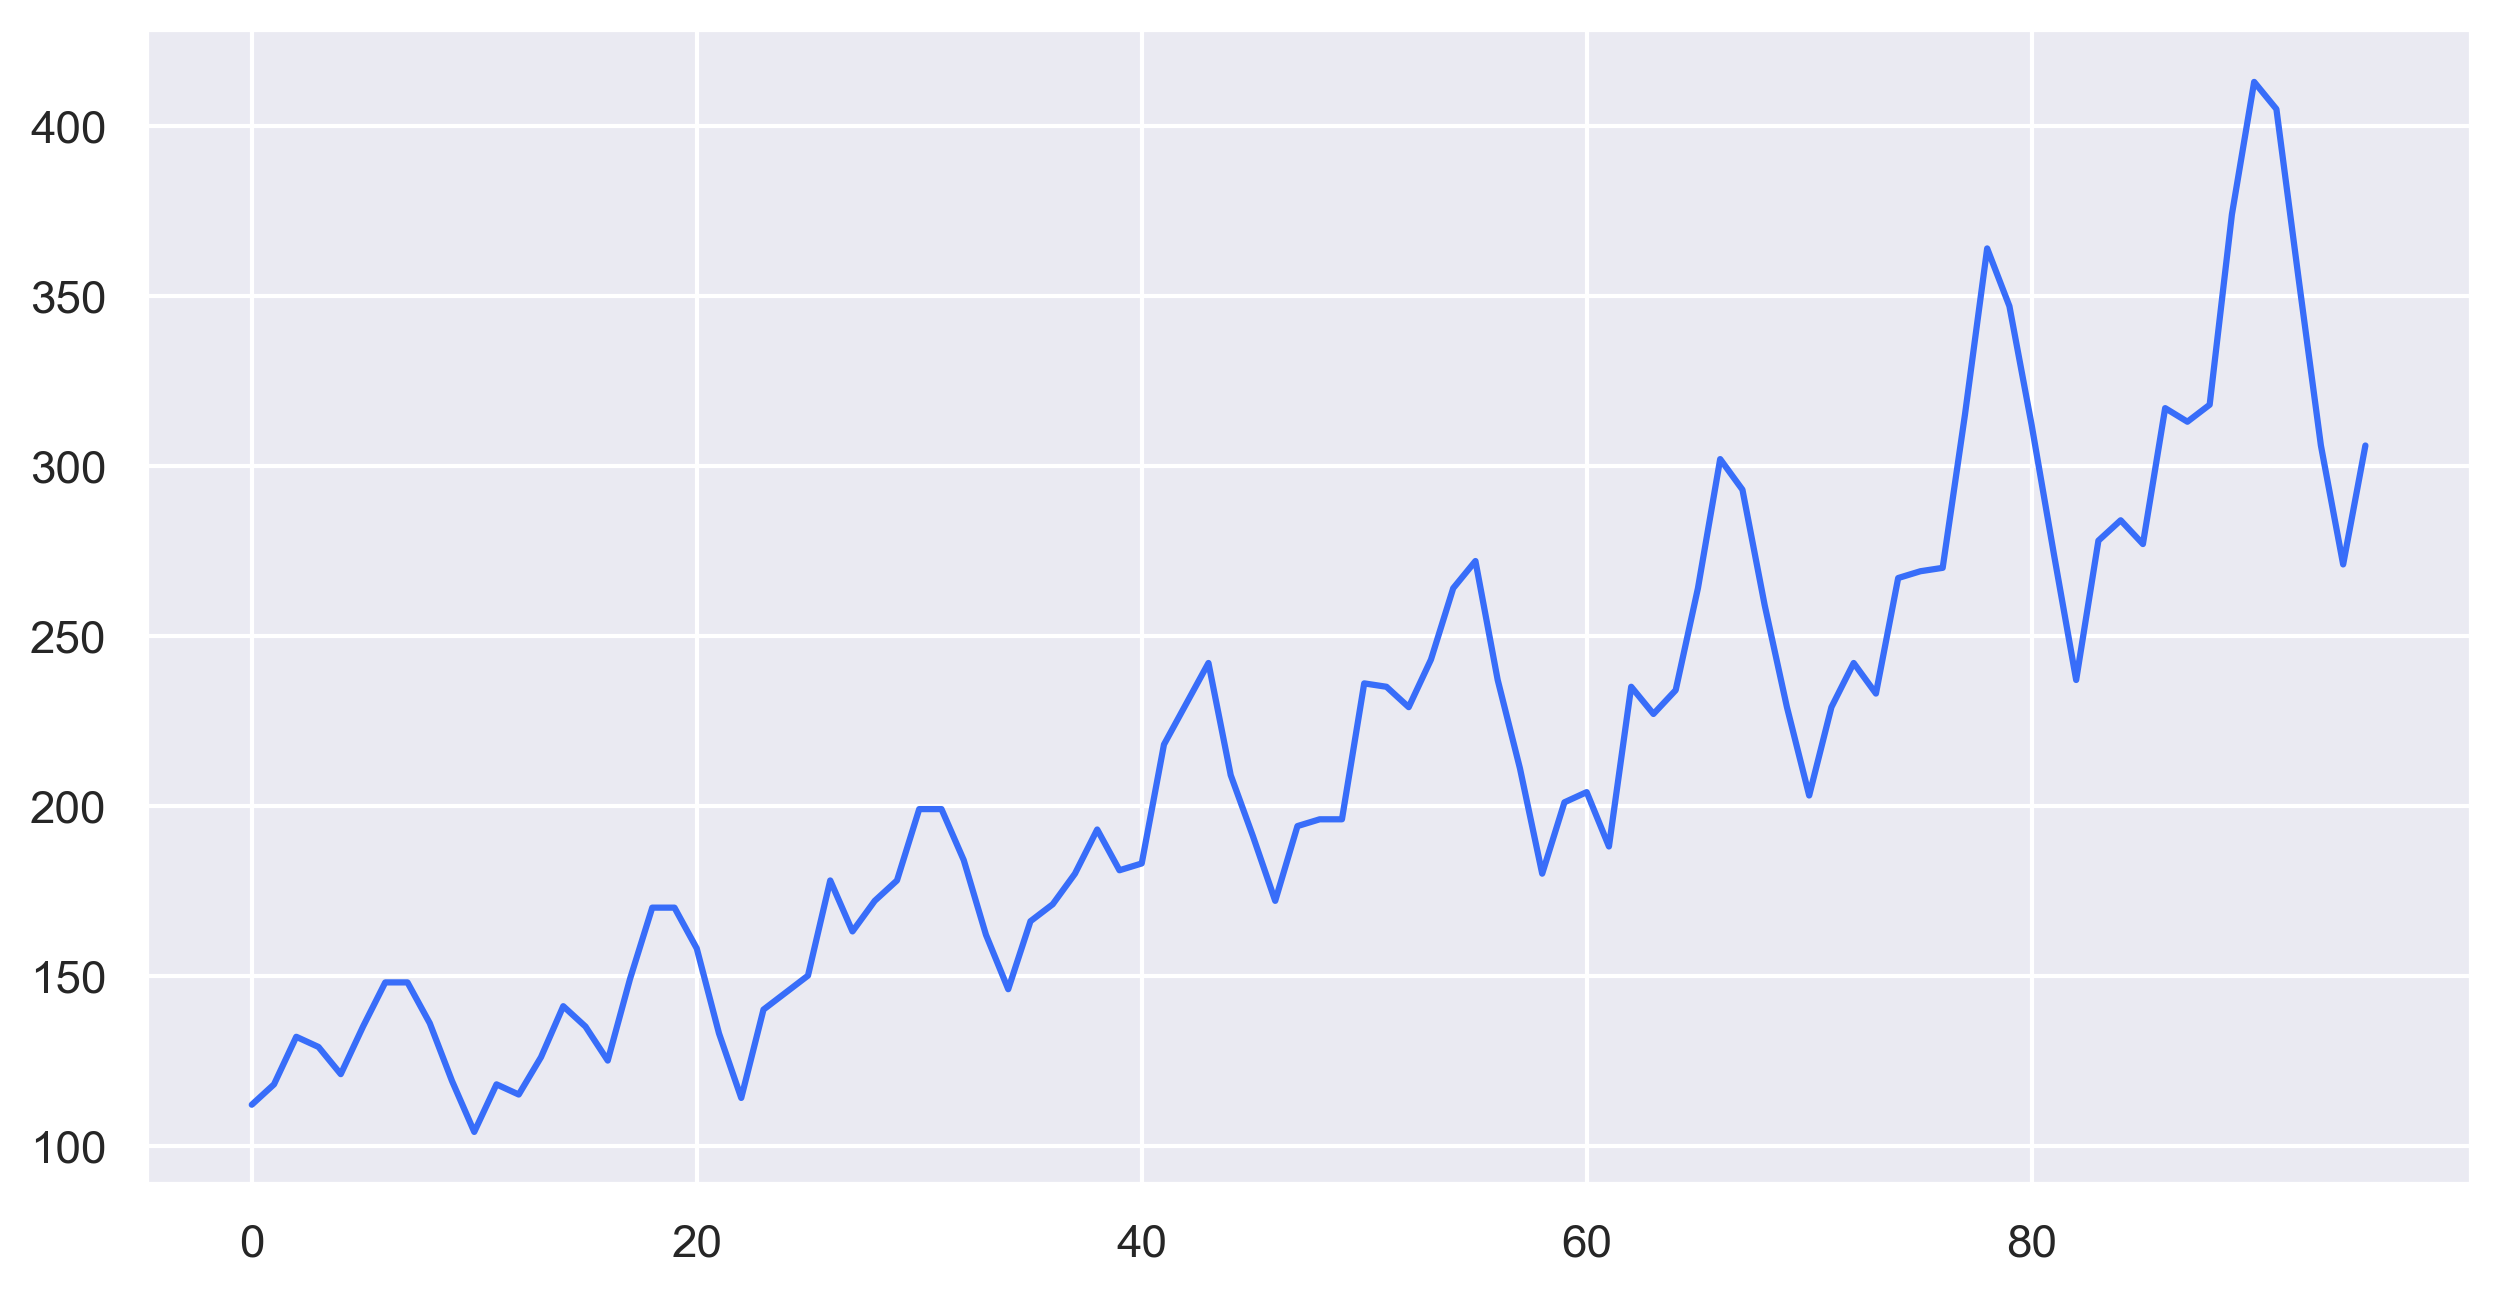

In [6]:
## to check stationary

plt.plot(df['Passengers'])

##### Time series is non stationary

### To calculate first order diff.

In [7]:
df['first_order']=df['Passengers'].diff(periods=1)
df

,Month,Passengers,first_order
0,Jan-95,112,NaN
1,Feb-95,118,6.0
2,Mar-95,132,14.0
3,Apr-95,129,-3.0
4,May-95,121,-8.0
...,...,...,...
91,Aug-02,405,-8.0
92,Sep-02,355,-50.0
93,Oct-02,306,-49.0
94,Nov-02,271,-35.0


In [8]:
## Drop null value
df.dropna(inplace=True)
df

,Month,Passengers,first_order
1,Feb-95,118,6.0
2,Mar-95,132,14.0
3,Apr-95,129,-3.0
4,May-95,121,-8.0
5,Jun-95,135,14.0
...,...,...,...
91,Aug-02,405,-8.0
92,Sep-02,355,-50.0
93,Oct-02,306,-49.0
94,Nov-02,271,-35.0


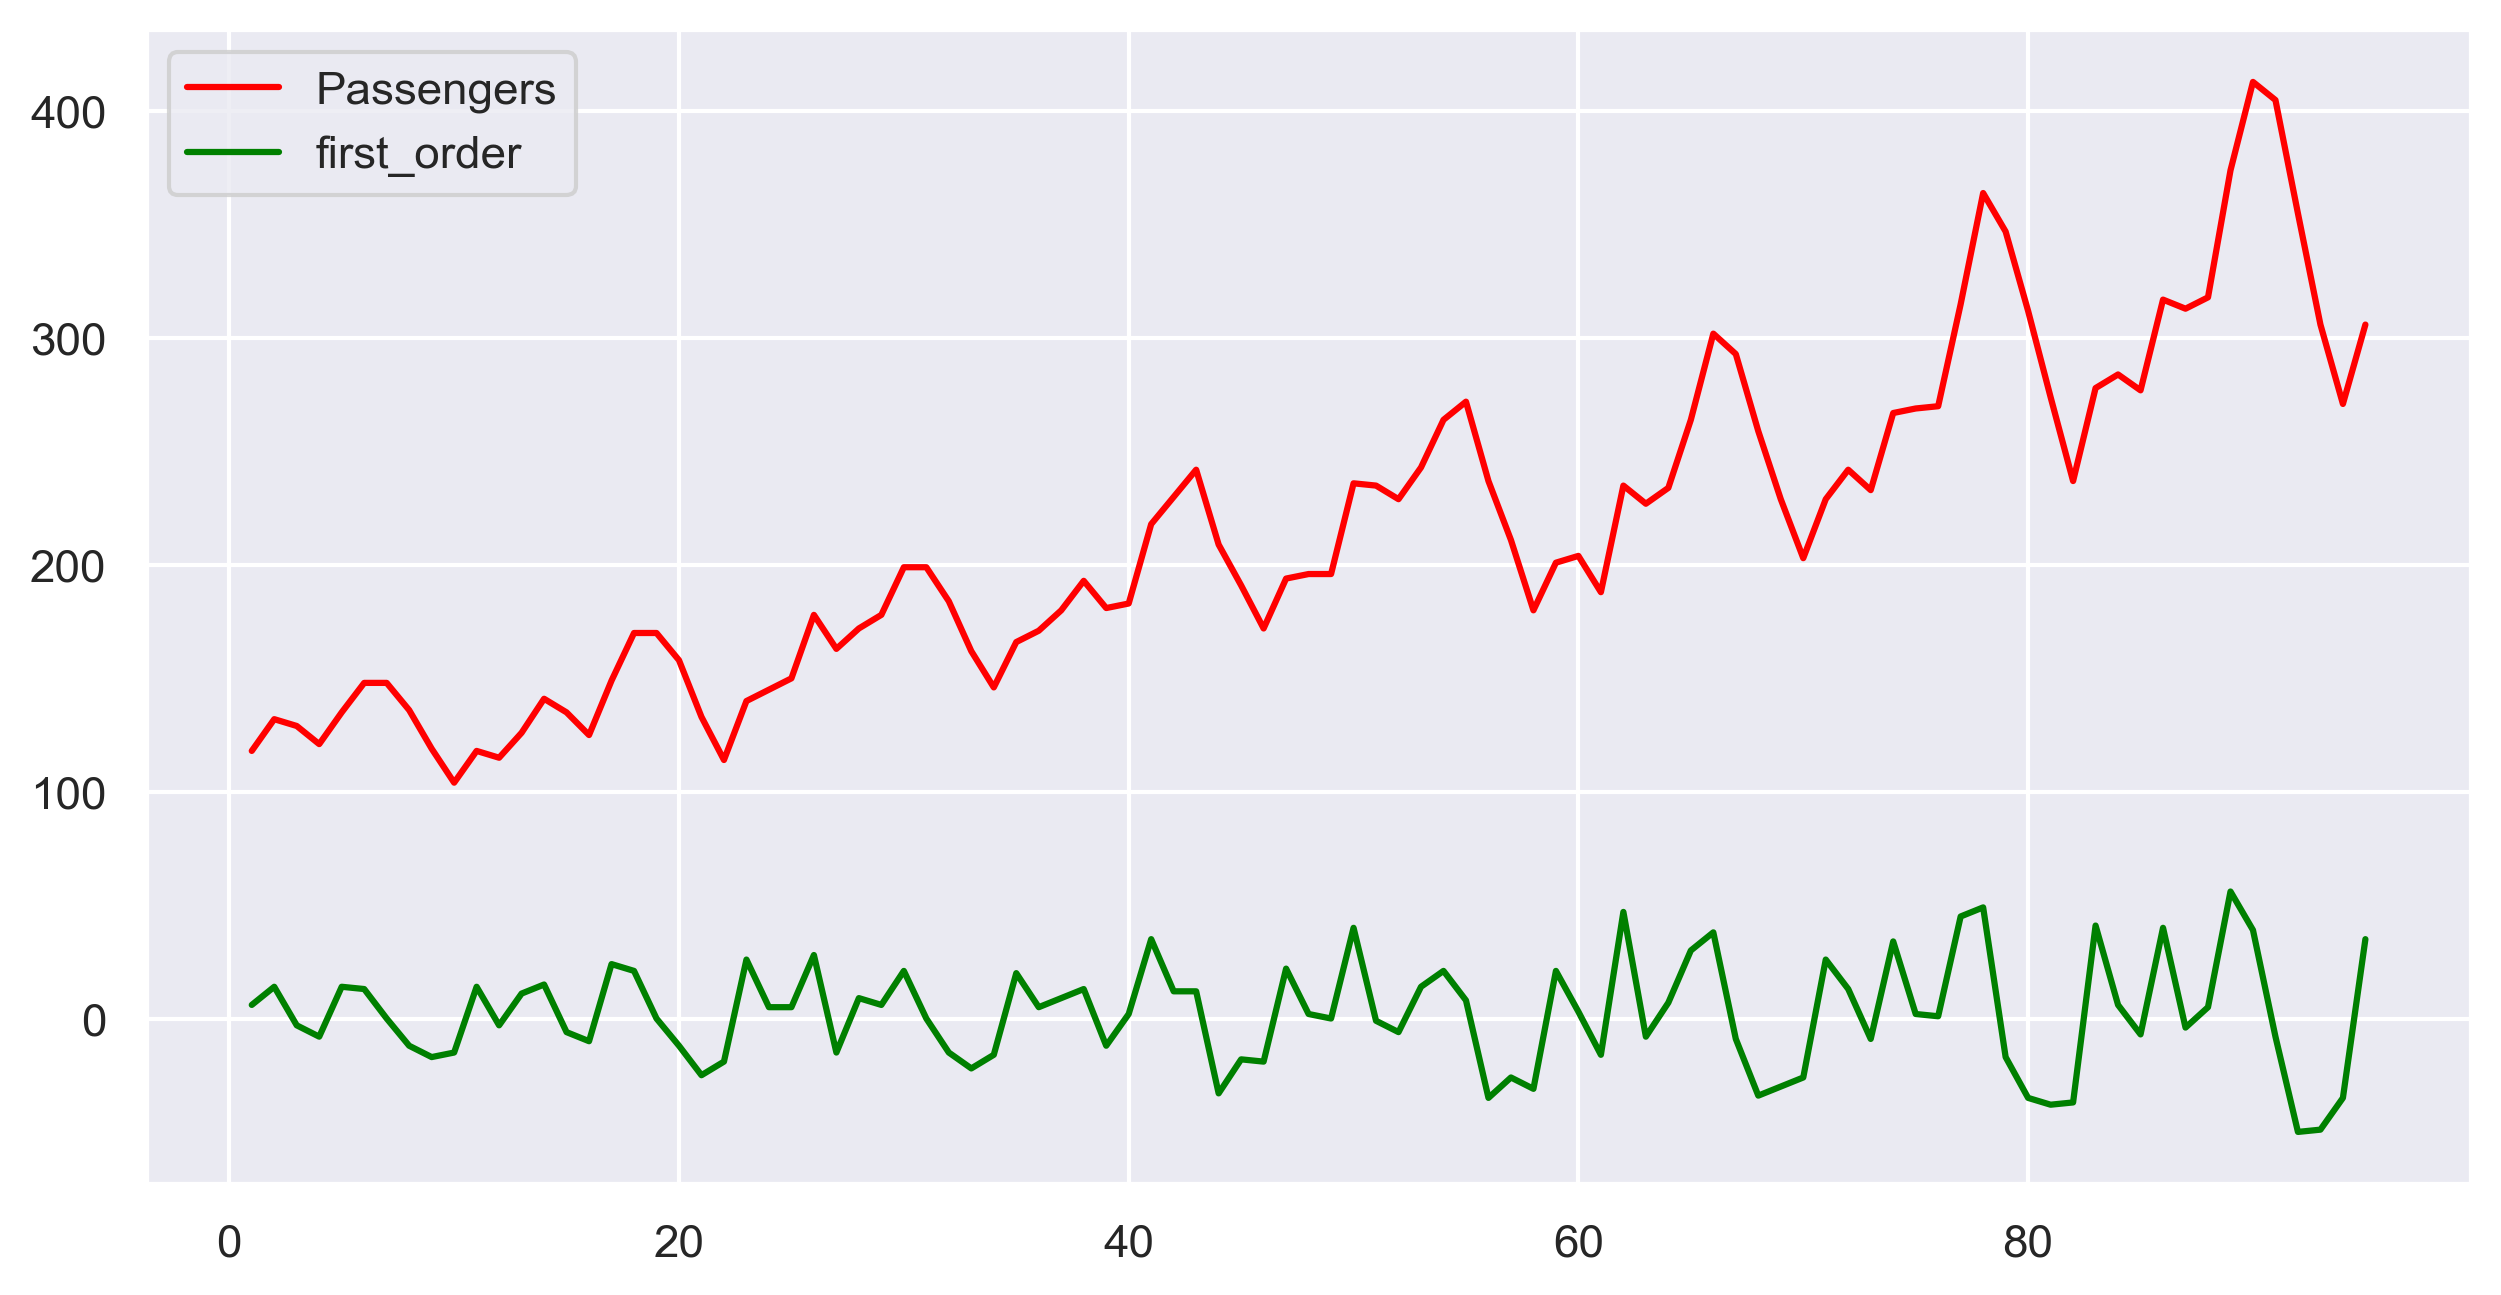

In [9]:
import statsmodels.formula.api as smf
plt.plot(df['Passengers'],color='red',label='Passengers')
plt.plot(df['first_order'],color='green',label='first_order')
plt.legend()

##### Now data became stationary

# Calculate autocorrelation value

In [10]:
acf_value=acf(df['first_order'])
acf_value

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974])

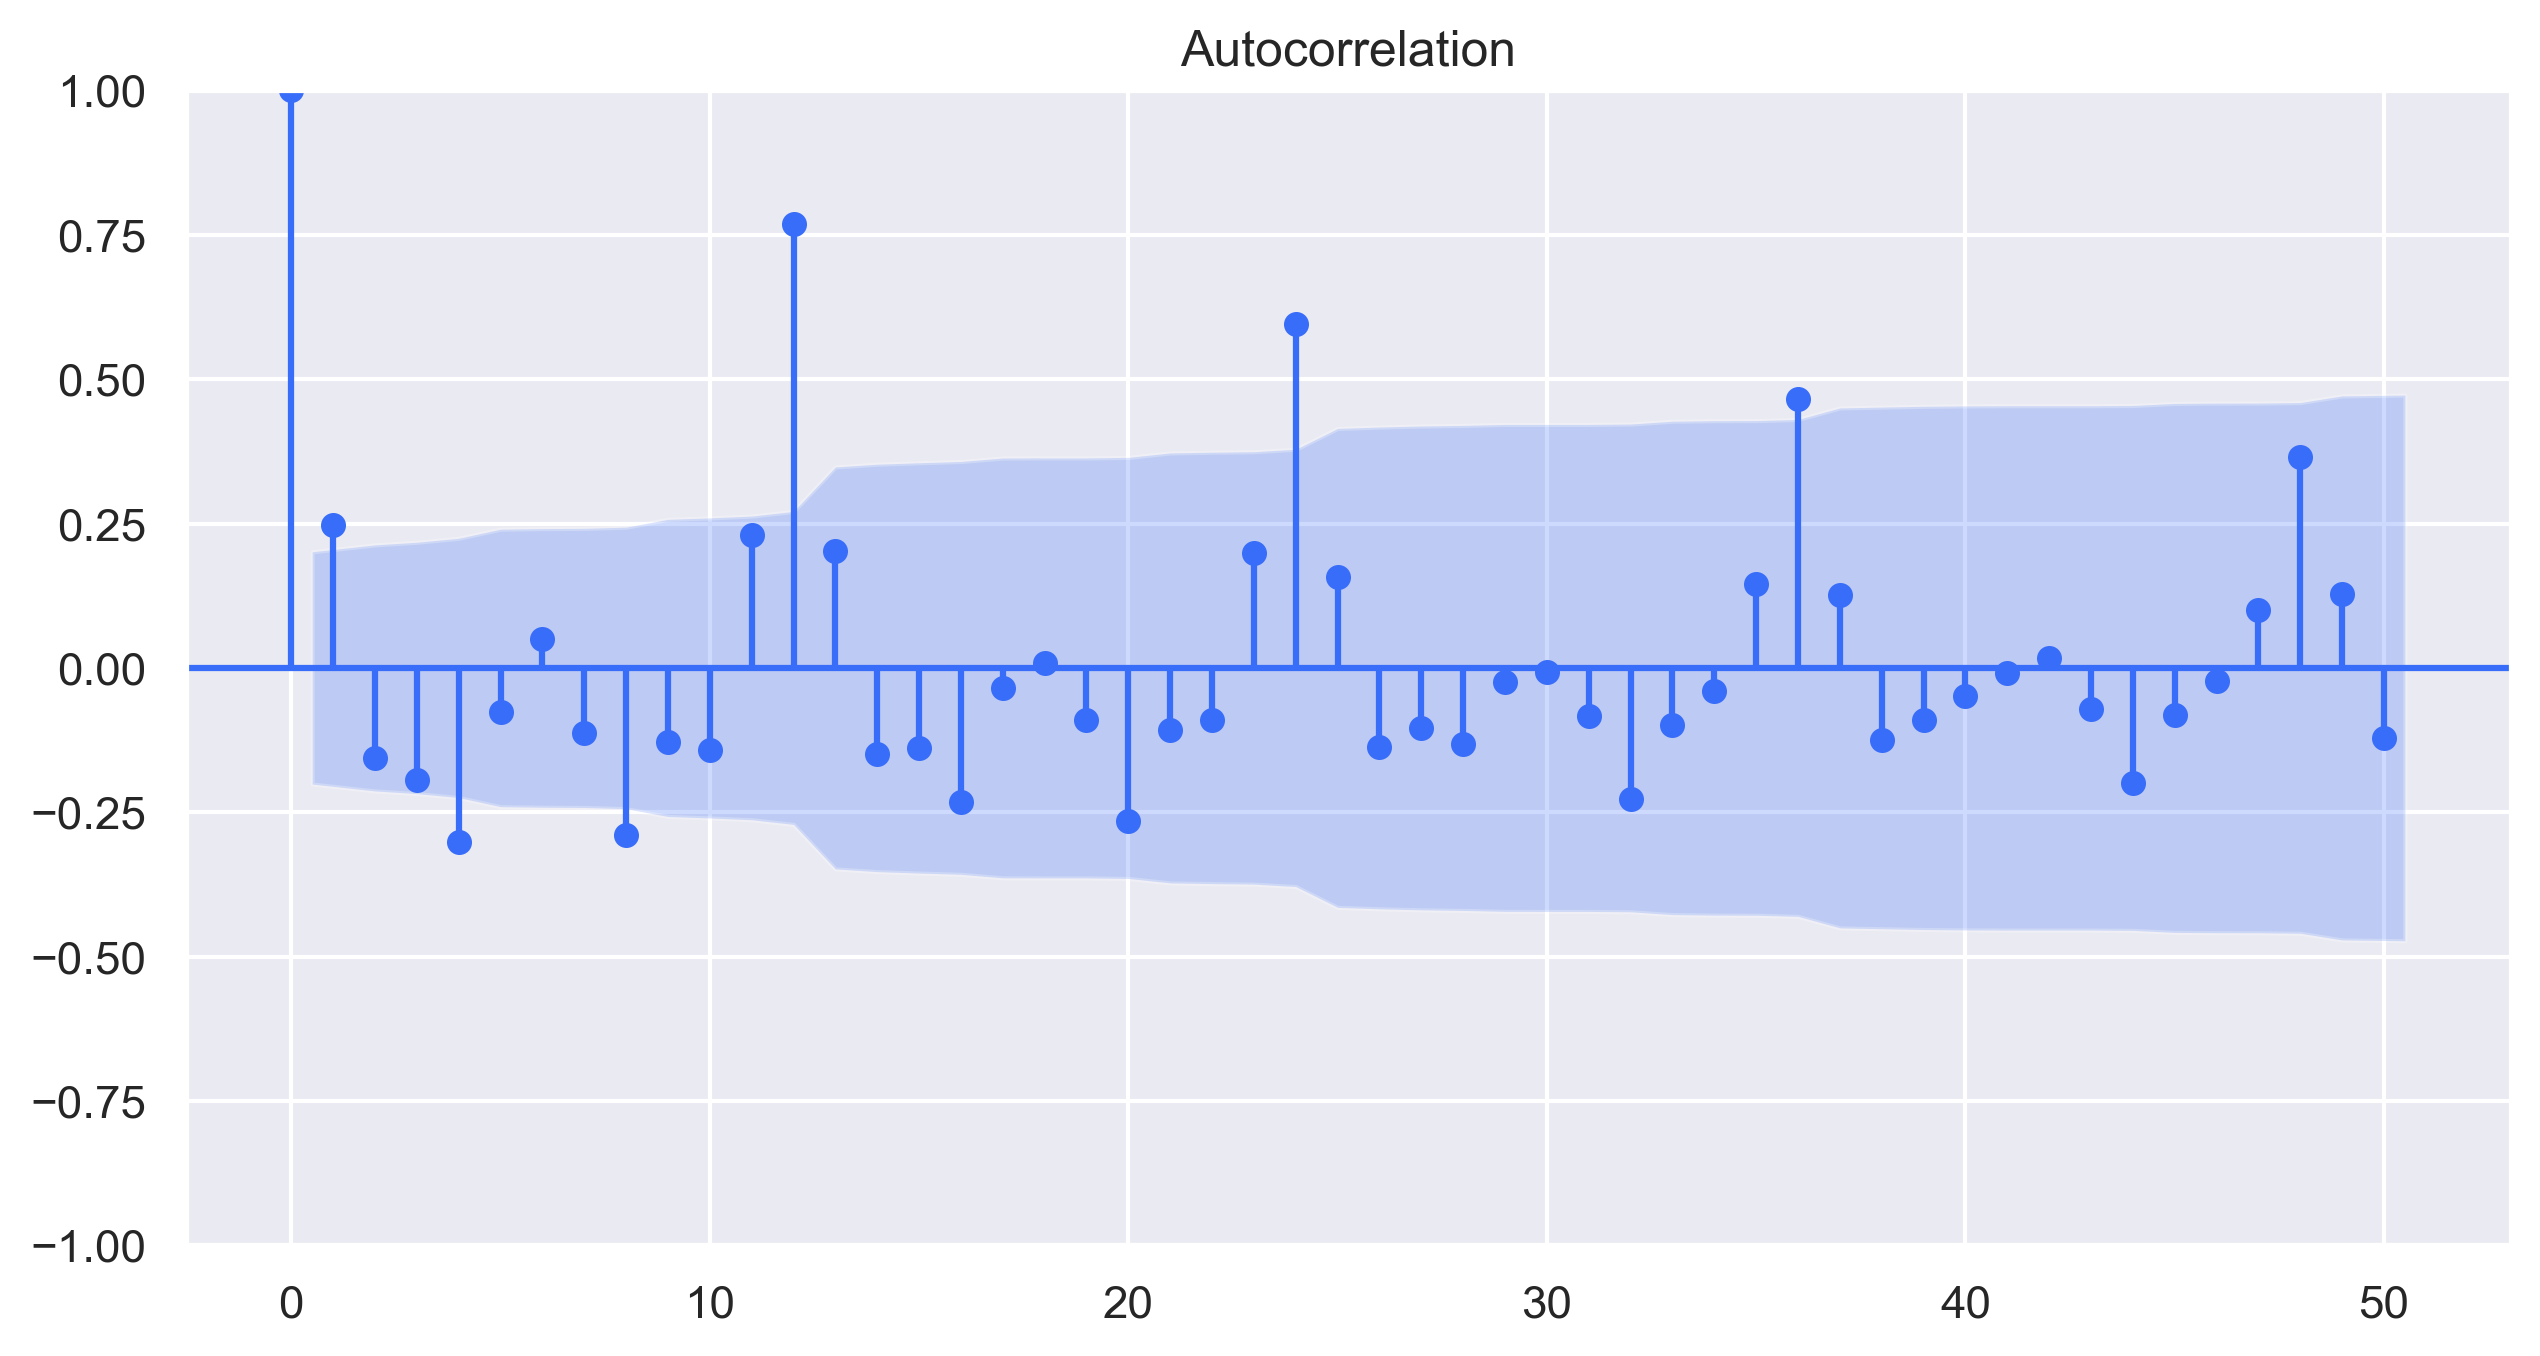

In [11]:
## plot acf
plot_acf(df['first_order'],lags=50);

#### Looking at above graph  12th value impact strongly on current value

# Partial Autocorrelation Function

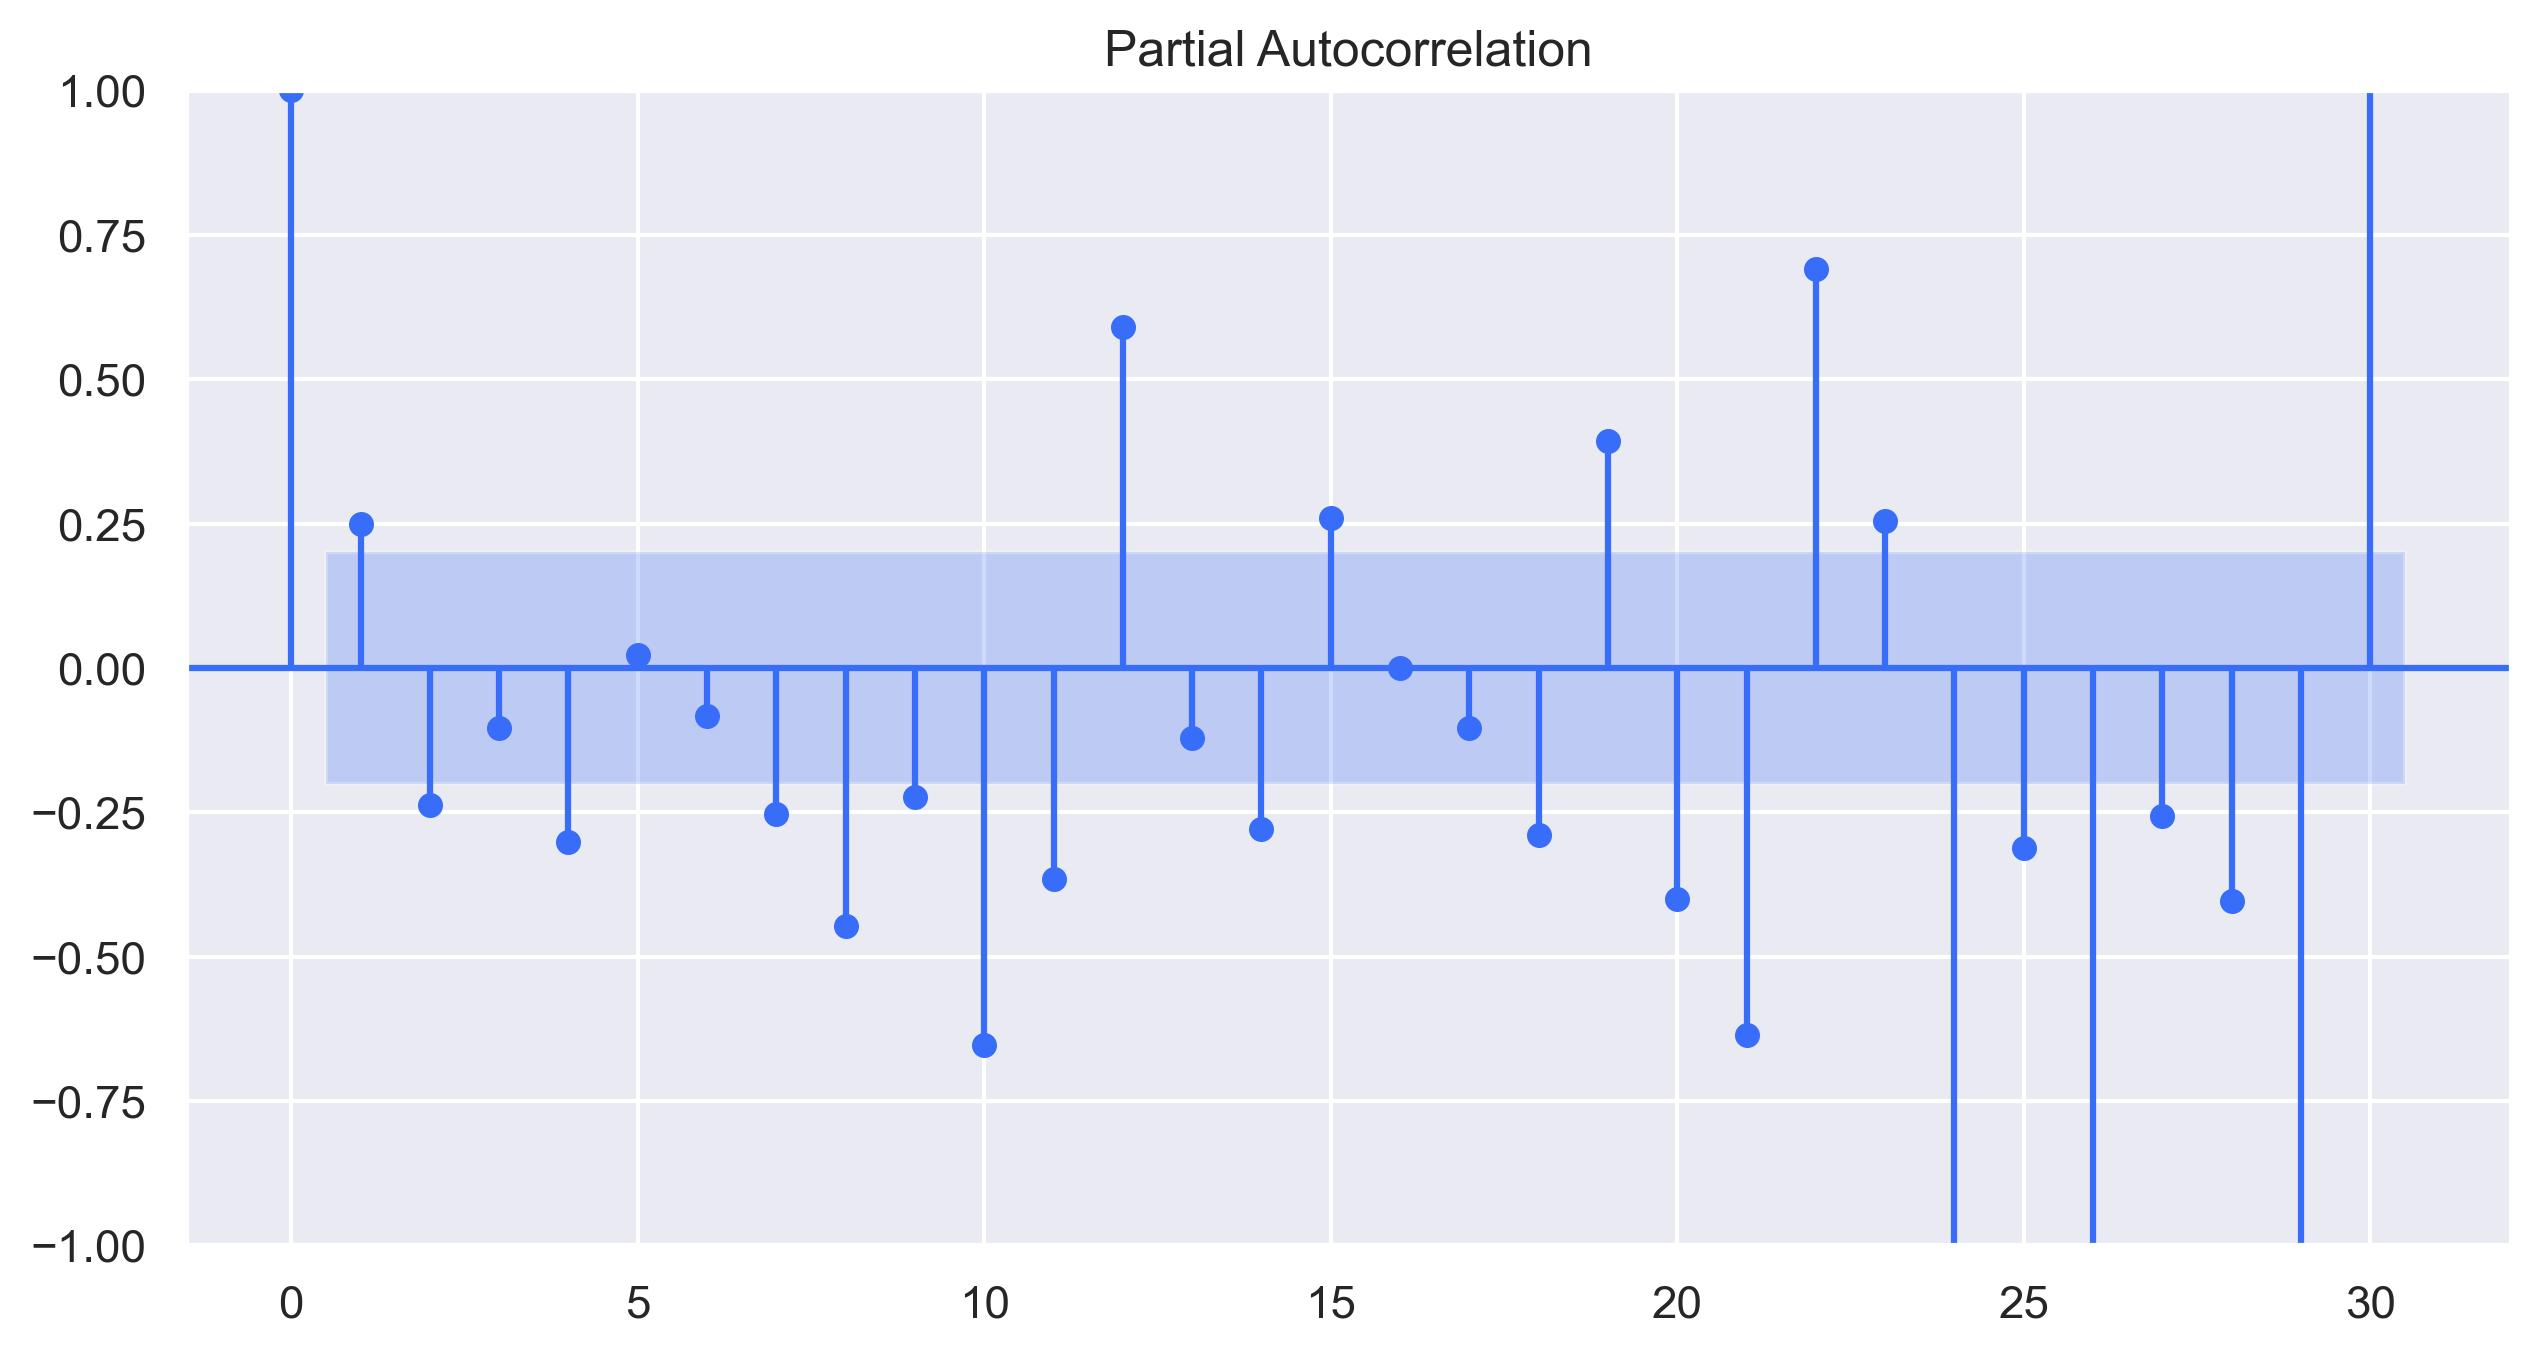

In [12]:
# Plot Pacf

plot_pacf(df['first_order'],lags=30);

# Different Models

## 1) ARIMA Model

#### Train & Test split

In [13]:
train=df.iloc[:-30,:]
test=df.tail(30)

In [14]:
df.shape

(95, 3)

In [15]:
train.shape

(65, 3)

In [16]:
test.shape

(30, 3)

In [17]:
order=auto_arima(df['Passengers'])

In [18]:
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [19]:
arima_model=ARIMA(train['Passengers'],order=(3,1,2)).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
arima_ypred=arima_model.predict(start=65,end=94)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [21]:
arima_ypred

65    260.185667
66    250.442395
67    243.981267
68    240.154551
69    238.750126
70    238.029280
71    237.992457
72    237.886751
73    237.982879
74    237.941151
75    238.001075
76    237.967306
77    238.000847
78    237.976277
79    237.996667
80    237.980357
81    237.993382
82    237.982847
83    237.991264
84    237.984483
85    237.989920
86    237.985550
87    237.989060
88    237.986241
89    237.988505
90    237.986687
91    237.988147
92    237.986974
93    237.987916
94    237.987160
Name: predicted_mean, dtype: float64

In [44]:
Arima_rmse=np.sqrt(mean_squared_error(test['Passengers'],arima_ypred))

In [45]:
Arima_rmse

75.97758022281229

# 2) Linear regression model

In [23]:
df['last_month']=df['Passengers'].shift(+1)

In [24]:
df.dropna(inplace=True)

In [25]:
df

,Month,Passengers,first_order,last_month
2,Mar-95,132,14.0,118.0
3,Apr-95,129,-3.0,132.0
4,May-95,121,-8.0,129.0
5,Jun-95,135,14.0,121.0
6,Jul-95,148,13.0,135.0
...,...,...,...,...
91,Aug-02,405,-8.0,413.0
92,Sep-02,355,-50.0,405.0
93,Oct-02,306,-49.0,355.0
94,Nov-02,271,-35.0,306.0


In [26]:
import statsmodels.formula.api as smf

In [27]:
linear=smf.ols('Passengers~last_month',data=df).fit()

In [46]:
linear_rmse=linear.rsquared

In [47]:
linear_rmse

0.8942414153530506

# 3) RandomForest Regressor

In [29]:
df['2_monthback']=df['Passengers'].shift(+2)

In [30]:
df['3_monthback']=df['Passengers'].shift(+3)

In [31]:
df.dropna(inplace=True)

In [32]:
df

,Month,Passengers,first_order,last_month,2_monthback,3_monthback
5,Jun-95,135,14.0,121.0,129.0,132.0
6,Jul-95,148,13.0,135.0,121.0,129.0
7,Aug-95,148,0.0,148.0,135.0,121.0
8,Sep-95,136,-12.0,148.0,148.0,135.0
9,Oct-95,119,-17.0,136.0,148.0,148.0
...,...,...,...,...,...,...
91,Aug-02,405,-8.0,413.0,374.0,318.0
92,Sep-02,355,-50.0,405.0,413.0,374.0
93,Oct-02,306,-49.0,355.0,405.0,413.0
94,Nov-02,271,-35.0,306.0,355.0,405.0


In [33]:
x=df.iloc[:,3:]
y=df['Passengers']

In [34]:
x

,last_month,2_monthback,3_monthback
5,121.0,129.0,132.0
6,135.0,121.0,129.0
7,148.0,135.0,121.0
8,148.0,148.0,135.0
9,136.0,148.0,148.0
...,...,...,...
91,413.0,374.0,318.0
92,405.0,413.0,374.0
93,355.0,405.0,413.0
94,306.0,355.0,405.0


In [35]:
## Train test split
from sklearn.ensemble import RandomForestRegressor

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
random_ypred=rf.predict(xtest)


In [37]:
ran_rmse=np.sqrt(mean_squared_error(ytest,random_ypred))

In [38]:
ran_rmse

26.30522011432632

# 4) XGB Regressor

In [40]:
from xgboost import XGBRegressor

In [41]:
xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)
xgb_ypred=xgb.predict(xtest)

In [42]:
xgb_rmse=np.sqrt(mean_squared_error(ytest,xgb_ypred))

In [43]:
xgb_rmse

31.069618476734036

## Models & RMSE values

In [48]:
table=pd.DataFrame({'Model':['Arima','Linear regression',
                             'Random forest regressor','XGB regressor'],
                    'RMSE':[Arima_rmse,linear_rmse,ran_rmse,xgb_rmse]})

In [49]:
table

,Model,RMSE
0,Arima,75.977580
1,Linear regression,0.894241
2,Random forest regressor,26.305220
3,XGB regressor,31.069618


### Linear regression model is best for forcasting

In [50]:
df

,Month,Passengers,first_order,last_month,2_monthback,3_monthback
5,Jun-95,135,14.0,121.0,129.0,132.0
6,Jul-95,148,13.0,135.0,121.0,129.0
7,Aug-95,148,0.0,148.0,135.0,121.0
8,Sep-95,136,-12.0,148.0,148.0,135.0
9,Oct-95,119,-17.0,136.0,148.0,148.0
...,...,...,...,...,...,...
91,Aug-02,405,-8.0,413.0,374.0,318.0
92,Sep-02,355,-50.0,405.0,413.0,374.0
93,Oct-02,306,-49.0,355.0,405.0,413.0
94,Nov-02,271,-35.0,306.0,355.0,405.0


## Forecasting

In [53]:
newdf=pd.DataFrame({'last_month':[234,190,122,167]})

In [54]:
newdf

,last_month
0,234
1,190
2,122
3,167


In [57]:
linear_ypred=linear.predict(newdf)

In [58]:
linear_ypred

0    234.881110
1    193.319323
2    129.087470
3    171.593843
dtype: float64

In [61]:
newdf['linear_ypred']=linear_ypred

In [62]:
newdf

,last_month,linear_ypred
0,234,234.881110
1,190,193.319323
2,122,129.087470
3,167,171.593843


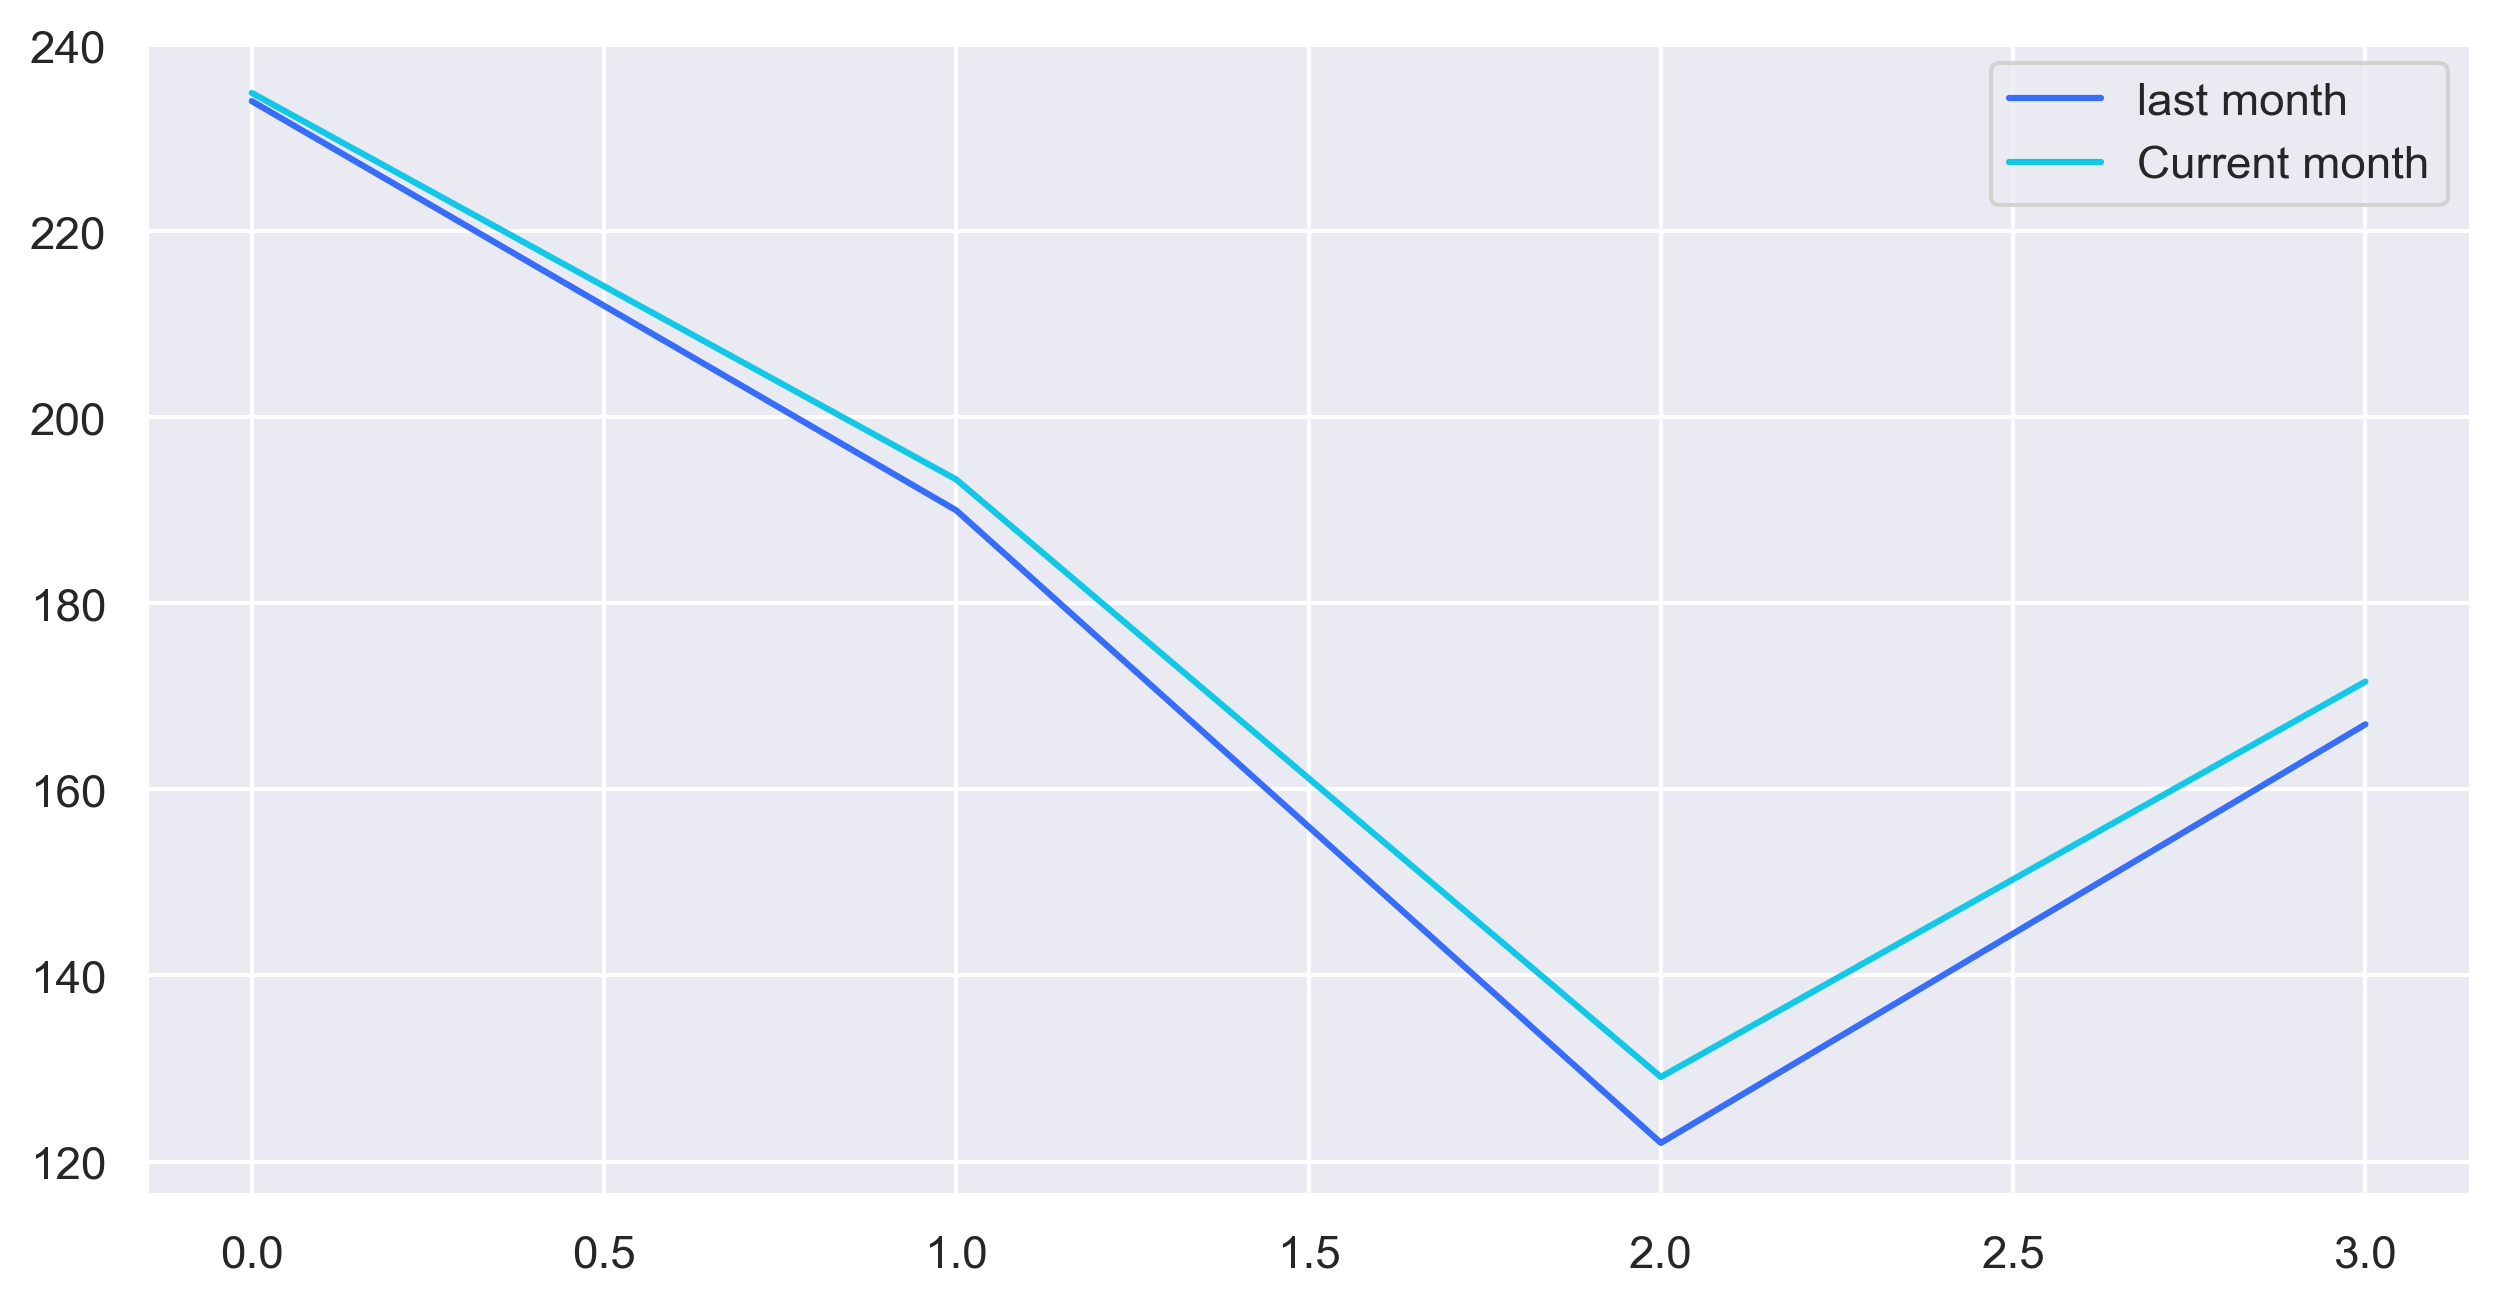

In [66]:
plt.plot(newdf['last_month'],label='last month')
plt.plot(newdf['linear_ypred'],label='Current month')
plt.legend()